In [ ]:
import wget
import urllib
import re
import pytz as tz
import numpy as np
import xlrd
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20.0,20.0]
plt.rcParams.update({'font.size': 10})
plt.rcParams['xtick.major.pad'] = '5'
plt.rcParams['ytick.major.pad'] = '5'

plt.style.use('ggplot')

In [ ]:
import os
import shutil 

datadir = './data'
if not os.path.exists(datadir):
    os.makedirs(datadir)

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default of credit card clients.xls' 
filename = os.path.join(datadir,'default of credit card client.xls')
if not os.path.isfile(filename):
    wget.download(url, out=filename)

In [ ]:
df = pd.read_csv( "/Users/jasdeep/Downloads/UCI_Credit_Card33.csv")

In [ ]:
df.columns = [x.lower() for x in df.columns]
df = df.rename(index=str,columns = {"pay_0":"pay_1"})
df = df.drop("id", axis = 1)
df.columns

Index(['limit_bal', 'gender', 'education', 'marriage', 'age', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'default.payment.next.month'],
      dtype='object')

In [ ]:
print("Explanatory variables: {}".format(len(df.columns)-1))
print("Number of Observation: {}".format(df.shape[0]))
df['target'] =  df['default.payment.next.month'].astype('category')


print("Target variable:  '{}'->'{}'".format('default.payment.next.month','target'))

Explanatory variables: 23
Number of Observation: 30000
Target variable:  'default.payment.next.month'->'target'


In [ ]:
pattern = re.compile("^pay_[0-9]+$")
pay_status_columns = [x for x in df.columns if (pattern.match(x)) ]

df[pay_status_columns].head(10)

,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6
0,2,2,-1,-1,-2,-2
1,-1,2,0,0,0,2
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,-1,0,-1,0,0,0
5,0,0,0,0,0,0
6,0,0,0,0,0,0
7,0,-1,-1,0,0,-1
8,0,0,2,0,0,0
9,-2,-2,-2,-2,-1,-1


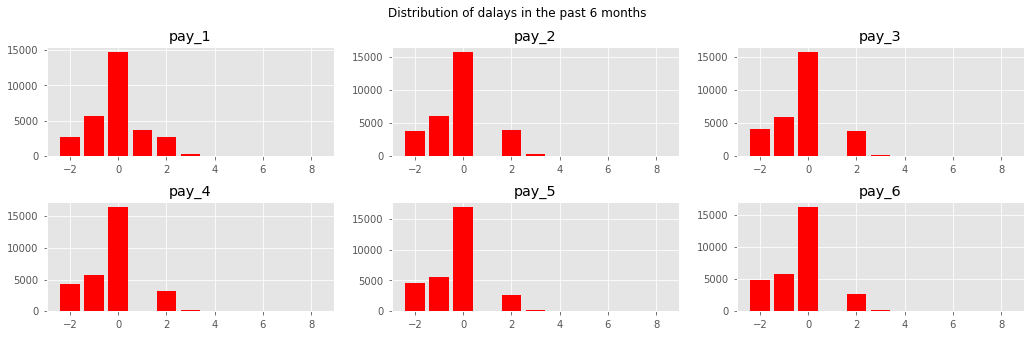

In [ ]:
pattern = re.compile("^pay_[0-9]+$")
pay_status_columns = [x for x in df.columns if (pattern.match(x)) ]

#col = ['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

fig, ax = plt.subplots(2,3)
fig.set_size_inches(15,5)
fig.suptitle('Distribution of dalays in the past 6 months')



for i in range(len(pay_status_columns)):
    # col = ['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
    row,col = int(i/3),i%3
   
    
    d = df[pay_status_columns[i]].value_counts()
    ax[row,col].bar(d.index, d, align='center', color = 'r')
    ax[row,col].set_title(pay_status_columns[i])
    
    
plt.tight_layout(pad=3.0, w_pad=1.5,h_pad = 1.0)
plt.show()
    
    

In [ ]:
pattern = re.compile("^bill_amt[0-9]+$")
bill_amount = [x for x in df.columns if (pattern.match(x)) ]


df[bill_amount].describe()


,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [ ]:
df[bill_amount].head(20)

,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6
0,3913.0,3102.0,689.0,0.0,0.0,0.0
1,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0
2,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0
3,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0
4,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0
5,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0
6,367965.0,412023.0,445007.0,542653.0,483003.0,473944.0
7,11876.0,380.0,601.0,221.0,-159.0,567.0
8,11285.0,14096.0,12108.0,12211.0,11793.0,3719.0
9,0.0,0.0,0.0,0.0,13007.0,13912.0


In [ ]:
df['limit_bal'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: limit_bal, dtype: float64

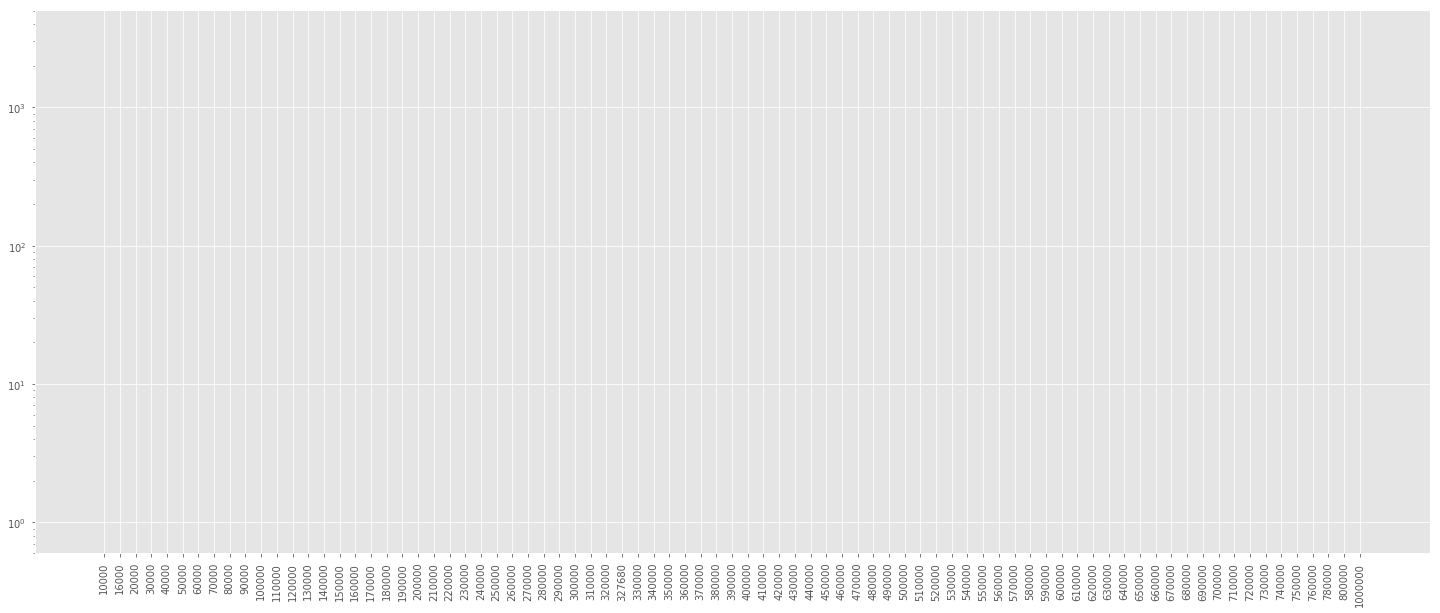

In [ ]:
fig = plt.figure()
fig.set_size_inches(25,10)
ax = fig.add_subplot(111)


d = df.groupby(['limit_bal']).size()
ax.set_yscale("log")
ax.set_xticks(np.arange(len(d)))
ax.set_xticklabels(['%d' % i for i in d.index],rotation = 'vertical')
p = ax.bar(np.arange(len(d)), d, color = 'blue')
plt.show()


defaulting account are 23464.0% out of 30000 observations


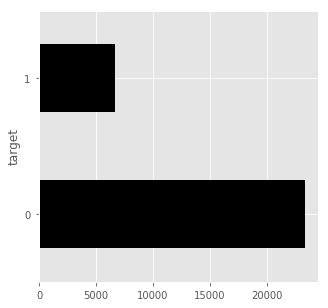

In [ ]:
fig = plt.figure()
fig.set_size_inches(5,5)
d = df.groupby(['target']).size()



print('defaulting account are {}% out of {} observations'.format(100*d[1]/d[1]+d[0], d[1]+d[0]))

p = d.plot(kind = 'barh', color = 'black')
plt.show()

In [ ]:
df['sex']= df['gender'].astype('category').cat.rename_categories(['M','F'])
df['marriage']= df['marriage'].astype('category').cat.rename_categories(['na','married','single','other'])

In [ ]:
df['age_cat'] = pd.cut(df['age'], range(0,100,10), right = False)

In [ ]:
pattern = re.compile("^pay[0-9]+$")
pay_status_columns =[x for x in df.columns if (pattern.match(x))]
for i in pay_status_columns:
    df[1] = df[1].astype('category')

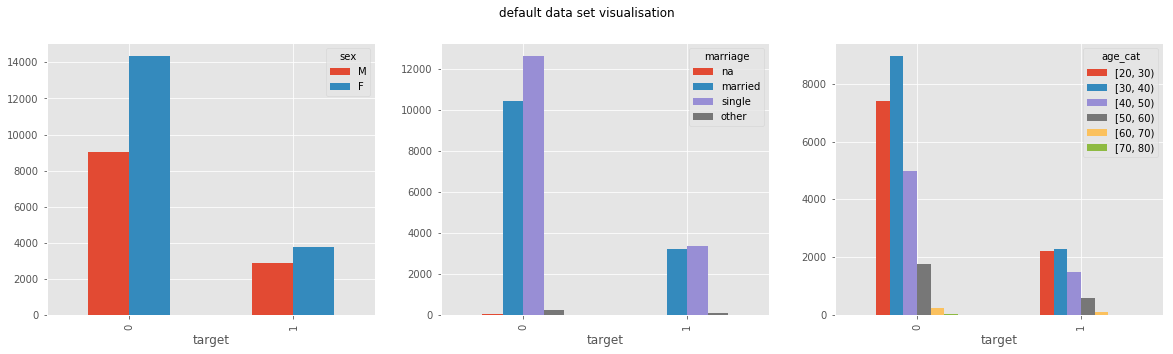

In [ ]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(20,5)
fig.suptitle('default data set visualisation')

d = df.groupby(['target','sex']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[0])

d = df.groupby(['target','marriage']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[1])

d = df.groupby(['target','age_cat']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[2])

plt.show()

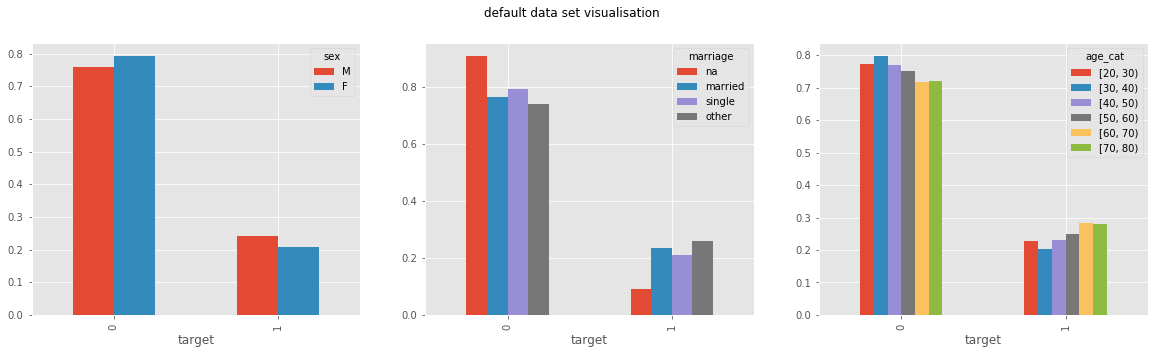

In [ ]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(20,5)
fig.suptitle('default data set visualisation')

d = df.groupby(['target','sex']).size().unstack(level=1)
d = d/d.sum()
p = d.plot(kind='bar', ax=ax[0])

d = df.groupby(['target','marriage']).size().unstack(level=1)
d = d/d.sum()
p = d.plot(kind='bar', ax=ax[1])

d = df.groupby(['target','age_cat']).size().unstack(level=1)
d = d/d.sum()
p = d.plot(kind='bar', ax=ax[2])

plt.show()

In [ ]:
#------------------- fearure engineering------------------------#

In [ ]:
def selcols(prefix , a= 1, b=6):
    return [prefix+str(i) for i in np.arange(a,b+1)]

In [ ]:
from math import log
df['pay_avg'] =  df[selcols('pay_')].mean(axis=1)
df['pay_std'] =  df[selcols('pay_')].std(axis=1)

In [ ]:
df['pay_amt_avg'] = df[selcols('pay_amt')].mean(axis=1)
df['pay_amt_avg_log'] = df['pay_amt_avg'].apply(lambda x: log(x+1))


for i in np.arange(1,7):
    df['pay_relamt'+str(i)] = df['pay_amt'+str(i)]/df['pay_amt_avg']
    
    
for i in np.arange(1,7):
    df['pay_amt_log'+str(i)] = df['pay_amt'+str(i)].apply(lambda x: log(x+1))
    

In [ ]:
df['bill_amt_avg'] = df[selcols('bill_amt')].mean(axis=1)
df['bill_amt_avg_log'] = df['bill_amt_avg'].apply(lambda x: log(x+1) if x>0 else 0)


for i in np.arange(1,7):
    df['bill_amt_sign'+str(i)] = df['bill_amt'+str(i)].apply(lambda x: float(x>0))

    
for i in np.arange(1,7):
    df['bill_amt_log'+str(i)] = df['bill_amt'+str(i)].apply(lambda x: log(x+1) if x>0 else 0 )
    
    
for i in np.arange(1,7):
    df['bill_relant'+str(i)] = df['bill_amt'+str(i)]/df['limit_bal']

In [ ]:
df['limit_bal_log'] = df['limit_bal'].apply(lambda x: log(x+1))
df['limit_bal_cat'] = pd.cut(df['limit_bal'],range(0, int(1e6),10000), right = False)

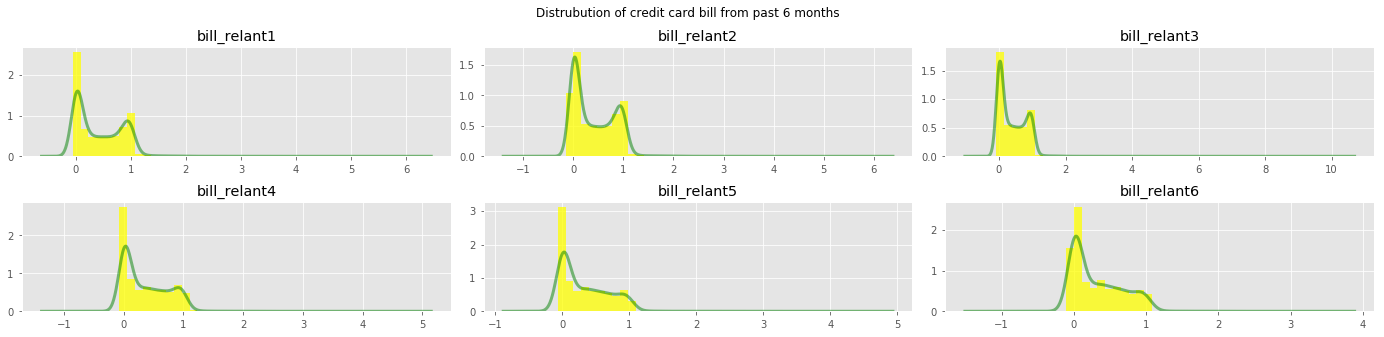

In [ ]:
from sklearn.neighbors.kde import KernelDensity


pattern =  re.compile("^bill_relant[0-9]+$")
columns =  [x for x in df.columns if (pattern.match(x))]


fig, ax = plt.subplots(2,3)
fig.set_size_inches(20,5)
fig.suptitle('Distrubution of credit card bill from past 6 months')


for i in range(len(columns)):
    row,col = int(i/3), i%3
    
    
    d = df[columns[i]]
    n,bins,patches = ax[row,col].hist(d,50,normed=1, facecolor='yellow',alpha=0.75)
    kde = KernelDensity(kernel='gaussian',bandwidth=0.1).fit(d.values.reshape(-1,1))
    x_grid = np.linspace(d.min(),d.max(),1000)
    log_pdf = kde.score_samples(x_grid.reshape(-1,1))
    
    
    ax[row,col].plot(x_grid,np.exp(log_pdf),color = 'green',alpha=0.5,lw=3)
    ax[row,col].set_title(columns[i])
plt.tight_layout(pad=3.0,w_pad=0.5,h_pad=1.0)
plt.show()

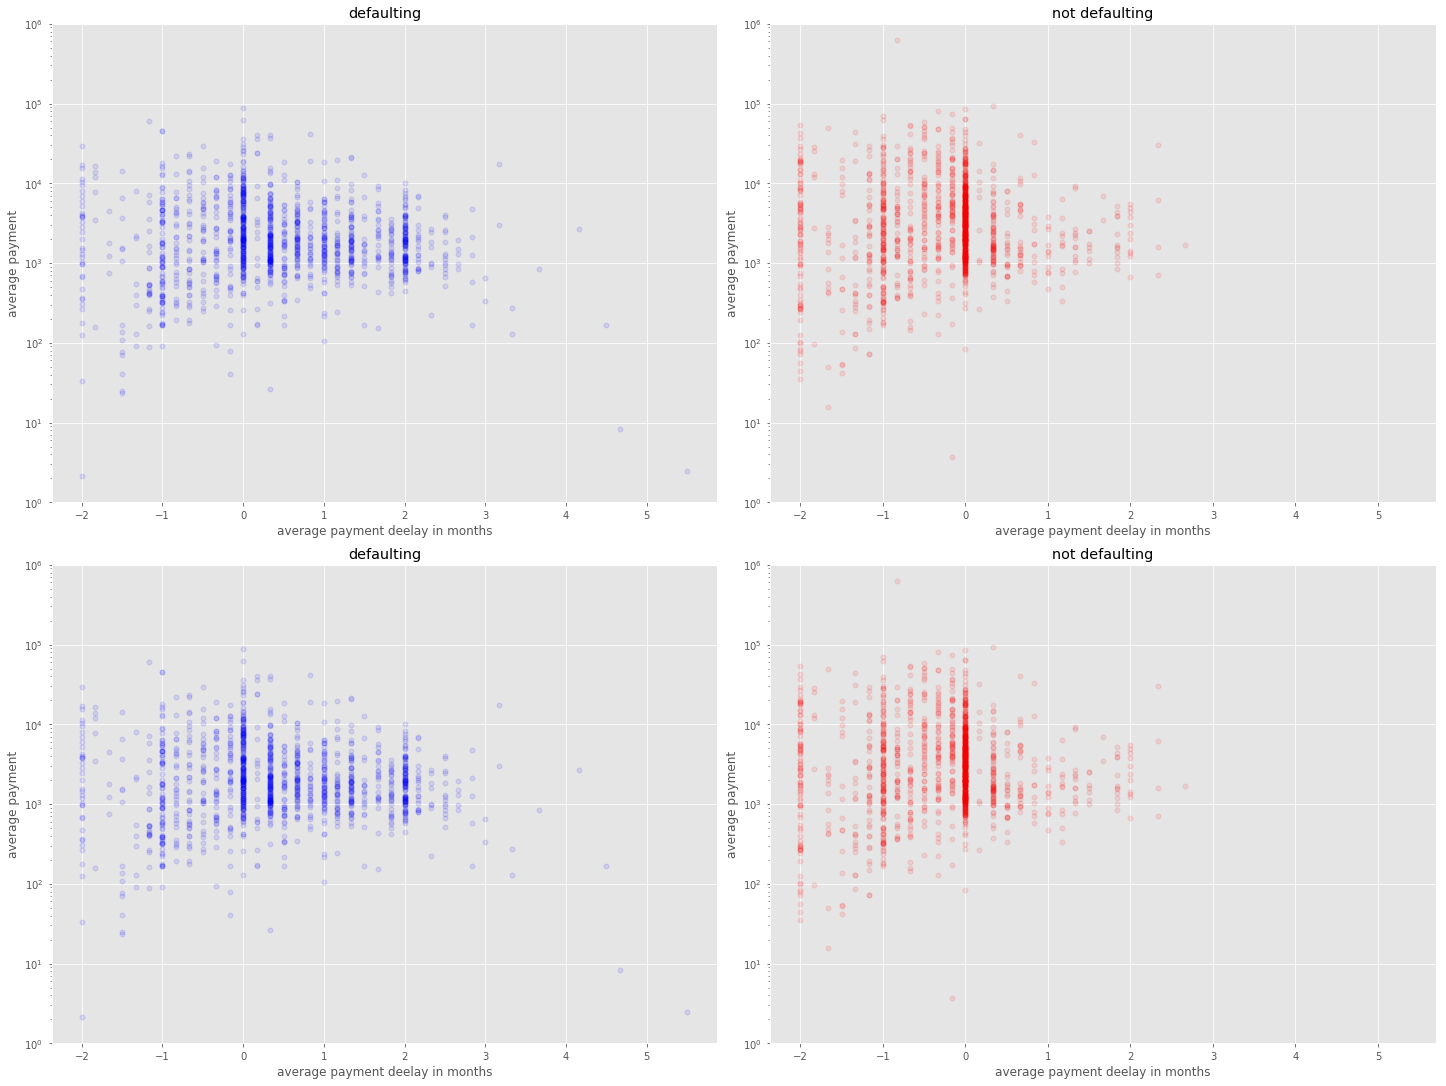

In [ ]:
def_no = df[df['target']==0].sample(1500)
def_yes = df[df['target']==1].sample(1500)



fig,ax = plt.subplots(2,2)
fig.set_size_inches(20,15)

ax[0,0].set_ylim([1,1e6])
ax[0,0].set_title('defaulting')
ax[0,0].set_ylabel('average payment')
ax[0,0].set_xlabel('average payment deelay in months')
p = ax[0,0].semilogy(def_yes['pay_avg'],def_yes['pay_amt_avg'],'bo', markersize=5, alpha= 0.1)


ax[0,1].set_ylim([1,1e6])
ax[0,1].set_title('not defaulting')
ax[0,1].set_ylabel('average payment')
ax[0,1].set_xlabel('average payment deelay in months')
p = ax[0,1].semilogy(def_no['pay_avg'],def_no['pay_amt_avg'],'ro', markersize=5, alpha= 0.1)


ax[1,0].set_ylim([1,1e6])
ax[1,0].set_title('defaulting')
ax[1,0].set_ylabel('average payment')
ax[1,0].set_xlabel('average payment deelay in months')
p = ax[1,0].semilogy(def_yes['pay_avg'],def_yes['pay_amt_avg'],'bo', markersize=5, alpha= 0.1)


ax[1,1].set_ylim([1,1e6])
ax[1,1].set_title('not defaulting')
ax[1,1].set_ylabel('average payment')
ax[1,1].set_xlabel('average payment deelay in months')
p = ax[1,1].semilogy(def_no['pay_avg'],def_no['pay_amt_avg'],'ro', markersize=5, alpha= 0.1)



plt.tight_layout(pad=0.4,w_pad=0.5,h_pad=1.0)
plt.show()

In [ ]:
from patsy import dmatrices



formula ='target ~ '


formula += 'C(sex) + C(marriage) + C(education) + age'
formula += '+'+'+'.join(selcols('pay_'))


formula += '+' + 'C(age_cat)'
formula += '+' + 'C(limit_bal_cat) + limit_bal_log'


formula += '+' + 'pay_avg+pay_std'


formula += '+' + 'pay_amt_avg_log'
formula += '+' + '+'.join(selcols('pay_relamt'))
formula += '+' + '+'.join(selcols('pay_amt_log'))



formula += '+' +  'bill_amt_avg_log'
formula += '+' + '+'.join(selcols('bill_relant'))
formula += '+' + '+'.join(selcols('bill_amt_sign'))
formula += '+' + '+'.join(selcols('bill_amt_log'))


y, x = dmatrices(formula, data = df, return_type = 'dataframe')
y = y.iloc[:, 1]

In [ ]:
import itertools

from sklearn.metrics import roc_curve, auc, roc_auc_score, log_loss, accuracy_score, confusion_matrix

def plot_cm(ax, y_true,y_pred, classes, title, th=0.5, cmap=plt.cm.Blues):
    y_pred_labels = (y_pred>th).astype(int)
    
    
    cm =confusion_matrix(y_true, y_pred_labels)
    
    im= ax.imshow(cm, interpolation = 'nearest', cmap = cmap)
    ax.set_title(title)
    
    
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)
    
    
    thresh = cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        ax.text(j,i,cm[i,j],horizontalalignment='center',color='red' if cm[i,j] > thresh else "black")
    
    ax.set_ylabel('true label')
    ax.set_xlabel('predicted label')
    
    
def plot_auc(ax, y_train, y_train_pred, y_test, ytest_pred, th = 0.5):
    
    y_train_pred_labels = (y_train_pred>th).astype(int)
    y_test_pred_labels = (y_test_pred>th).astype(int)
    
    
    fpr_train,tpr_train,_ = roc_curve(y_train,y_train_pred)
    roc_auc_train = auc(fpr_train,tpr_train)
    acc_train = accuracy_score(y_train,y_train_pred_labels)
    
    fpr_test,tpr_test,_ = roc_curve(y_test,y_test_pred)
    roc_auc_test = auc(fpr_test,tpr_test)
    acc_test = accuracy_score(y_test,y_test_pred_labels)
    
    
    ax.plot(fpr_train, tpr_train)
    ax.plot(fpr_test,tpr_test)
    
    ax.plot([0,1],[0,1],'k--')
    
    
    ax.set_xlim([0.0,1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('false posative rate')
    ax.set_ylabel('true postavie rate')
    ax.set_title(' ROC curve')
    
    train_text = 'train acc = {:.3f}, auc = {:.2f}'.format(acc_train,roc_auc_train)
    test_text = 'test acc = {:.3f}, auc = {:.2f}'.format(acc_test,roc_auc_test)
    ax.legend([train_text,test_text])
    


In [ ]:
import warnings
from sklearn.feature_selection import SelectKBest, f_classif

warnings.simplefilter(action='ignore', category=(UserWarning,RuntimeWarning))


selector= SelectKBest(f_classif,25)
selector.fit(x,y)

SelectKBest(k=25, score_func=<function f_classif at 0x1117ba6a8>)

In [ ]:
top_indices = np.nan_to_num(selector.scores_).argsort()[-25:][::-1]
selector.scores_[top_indices]
x.columns[top_indices]

Index(['pay_1', 'pay_avg', 'pay_2', 'pay_3', 'pay_std', 'pay_4', 'pay_5',
       'pay_6', 'limit_bal_log', 'pay_amt_log1', 'pay_amt_avg_log',
       'bill_relant6', 'bill_relant5', 'bill_relant4', 'pay_amt_log2',
       'bill_relant3', 'bill_relant2', 'pay_amt_log3', 'bill_relant1',
       'pay_amt_log4', 'pay_amt_log6', 'pay_amt_log5',
       'C(limit_bal_cat)[T.Interval(20000, 30000, closed='left')]',
       'C(limit_bal_cat)[T.Interval(30000, 40000, closed='left')]',
       'C(education)[T.1]'],
      dtype='object')

In [ ]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
scaler.fit(x)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
from sklearn.pipeline import Pipeline

preprocessing = Pipeline([('anova',selector),('scale', scaler)])
preprocessing.fit(x,y)

x_prep = preprocessing.transform(x)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_prep, y, test_size=0.2,random_state=42 )

In [ ]:
#-------------------Model----------------#

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout

Using TensorFlow backend.


In [ ]:
input_dim = x_train.shape[1]

model = Sequential()
model.add(Dense(256, input_shape=(input_dim,), activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(10, activation = 'sigmoid'))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
from keras.callbacks import Callback

class Batchlogger(Callback):
    def on_train_begin(self,epoch,logs={}):
        self.log_values = {}
        for k in self.params['metrics']:
            self.log_values[k] = []
            
    def on_epoch_end(self,batch, logs={}):
         for k in self.params['metrics']:
                if k in logs:
                    self.log_values[k].append(logs[k])
                    
    def get_values(self, metric_name, window):
        d = pd.Series(self.log_values[metric_name])
        return d.rolling(window,center=False).mean()
    
    
b1=Batchlogger()
        


In [ ]:
histroy = model.fit(np.array(x_train),np.array(y_train), batch_size=25,epochs=5, verbose=1, callbacks=[b1], validation_data= (np.array(x_test),np.array(y_test)))


Train on 22853 samples, validate on 5714 samples
Epoch 1/5
22853/22853 [==============================] - 6s 265us/step - loss: 0.4563 - acc: 0.8000 - val_loss: 0.4313 - val_acc: 0.8175
Epoch 2/5
22853/22853 [==============================] - 5s 205us/step - loss: 0.4373 - acc: 0.8177 - val_loss: 0.4435 - val_acc: 0.8108
Epoch 3/5
22853/22853 [==============================] - 4s 197us/step - loss: 0.4338 - acc: 0.8189 - val_loss: 0.4268 - val_acc: 0.8213
Epoch 4/5
22853/22853 [==============================] - 4s 183us/step - loss: 0.4312 - acc: 0.8211 - val_loss: 0.4555 - val_acc: 0.8036
Epoch 5/5
22853/22853 [==============================] - 4s 188us/step - loss: 0.4299 - acc: 0.8229 - val_loss: 0.4270 - val_acc: 0.8155


In [ ]:
 score = model.evaluate(np.array(x_test),np.array(y_test), verbose = 0)
    
print ('Test log loss', score[0])
print('Test accuracy', score[1])



Test log loss 0.426974217271
Test accuracy 0.815540776976


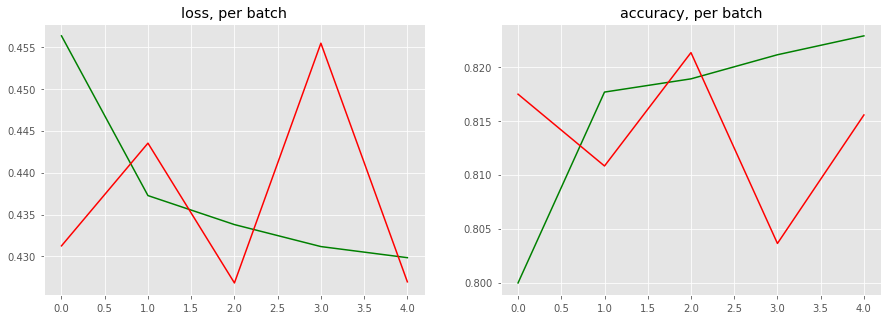

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.title('loss, per batch')
plt.plot(b1.get_values('loss',1),'g-',label='train');
plt.plot(b1.get_values('val_loss',1),'r',label = 'test')

plt.subplot(1, 2, 2)
plt.title('accuracy, per batch')
plt.plot(b1.get_values('acc',1),'g-',label='train');
plt.plot(b1.get_values('val_acc',1),'r',label = 'test')
plt.show()

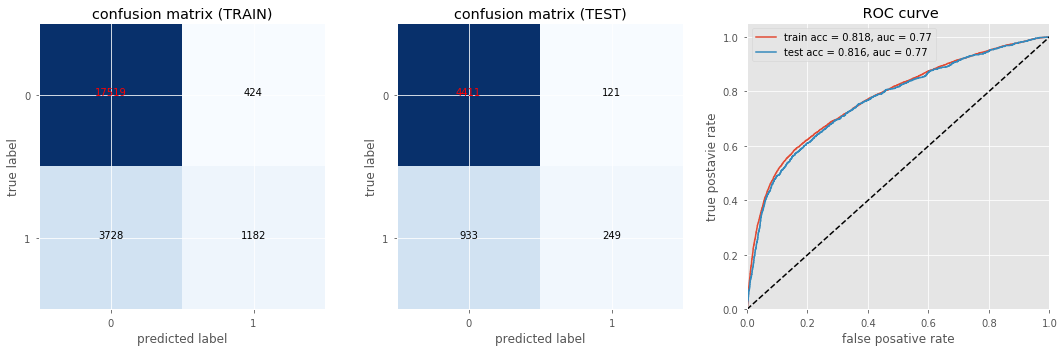

In [ ]:
y_train_pred = model.predict_on_batch(np.array(x_train))[:,0]
y_test_pred = model.predict_on_batch(np.array(x_test))[:,0]


fig,ax = plt.subplots(1,3)
fig.set_size_inches(15,5)

plot_cm(ax[0], y_train, y_train_pred,[0,1],'confusion matrix (TRAIN)')
plot_cm(ax[1], y_test, y_test_pred,[0,1],'confusion matrix (TEST)')


plot_auc(ax[2], y_train, y_train_pred, y_test, y_test_pred)


plt.tight_layout()
plt.show()


In [ ]:
model2 = Sequential()
model2.add(Dense(256, input_shape=(input_dim,), activation='relu',weights= model.layers[0].get_weights()))
model2.add(Dense(256, activation = 'relu', weights = model.layers[1].get_weights()))
model2.add(Dense(64, activation = 'relu', weights = model.layers[2].get_weights()))
model2.add(Dense(64, activation = 'relu', weights = model.layers[3].get_weights()))
model2.add(Dense(10, activation = 'relu', weights = model.layers[4].get_weights()))



In [ ]:
activations = model2.predict_on_batch(np.array(x_test))

In [ ]:
model.save("/Users/jasdeep/Desktop/abc")

print(dg)

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=25, verbose=0, n_iter=500, random_state=1337)
samples = tsne.fit_transform(activations)

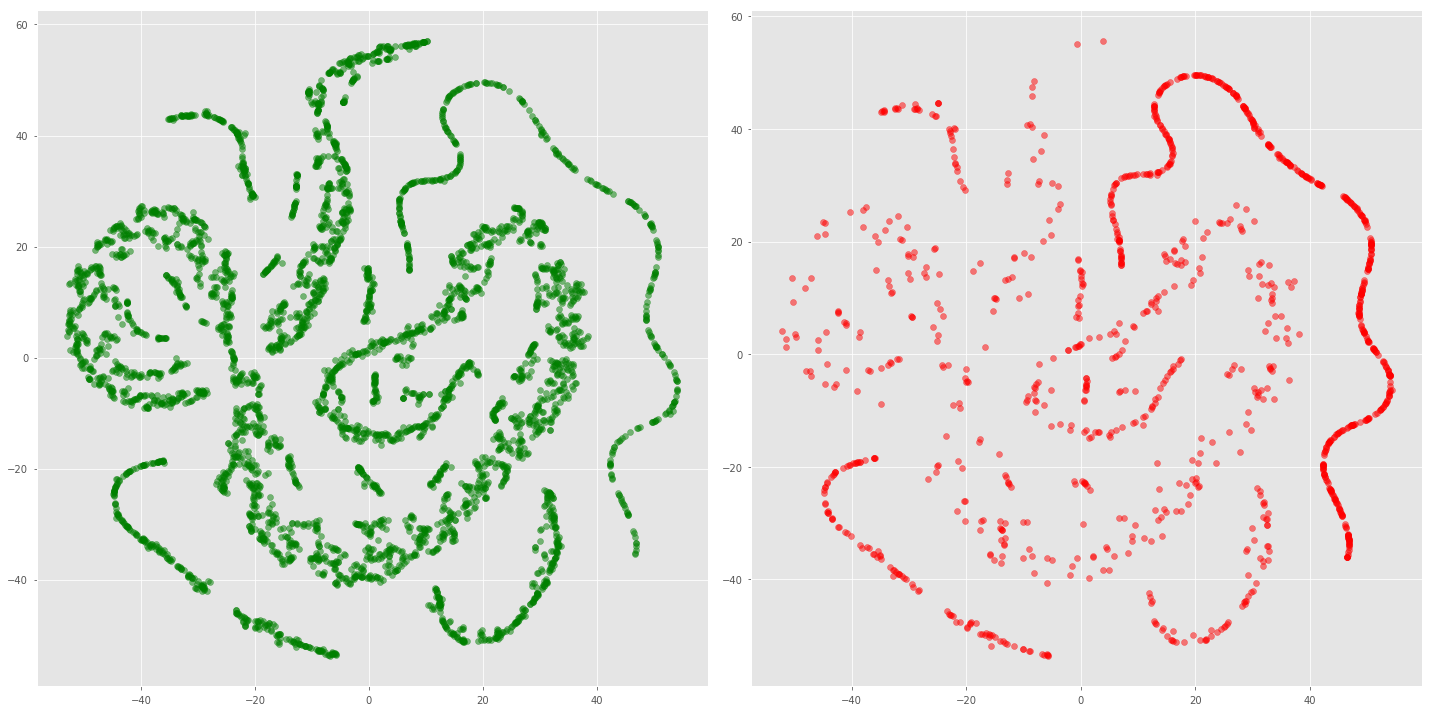

In [ ]:
fig,ax =  plt.subplots(1,2)
fig.set_size_inches(20,10)

ax[0].scatter(*samples[y_test==0].T, color='g', alpha = 0.5, label = 'defaault: NO')
ax[1].scatter(*samples[y_test==1].T, color='r', alpha = 0.5, label = 'defaault: YES')

plt.tight_layout()
plt.show()

The pyclustering core is not supported for platform 'darwin' (64bit).
Please, contact to 'pyclustering@yandex.ru'.


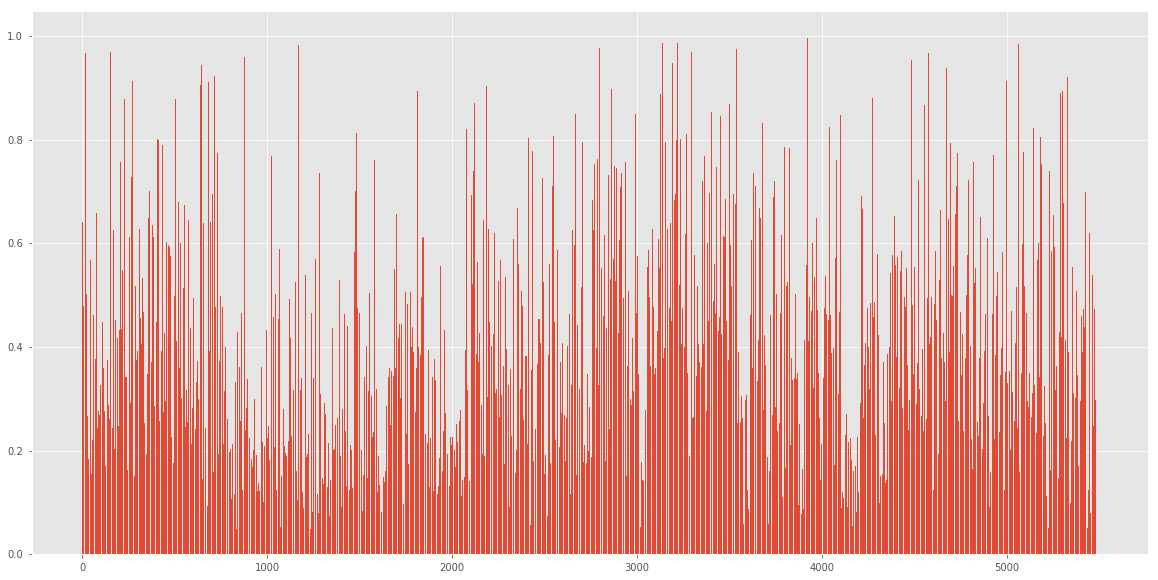

In [ ]:
from pyclustering.cluster.optics import optics
optics_instance =  optics(samples, 1 ,3 ,100);


optics_instance.process()


clusters = optics_instance.get_clusters();
noise = optics_instance.get_noise();



ordering = optics_instance.get_ordering();


indexes = [ i for i in range(0,len(ordering))];


fig = plt.figure()
fig.set_size_inches(20,10)
plt.bar(indexes, ordering);
plt.show()



In [ ]:
from sklearn.metrics import f1_score, accuracy_score, precision_score,  recall_score

pred = (y_test_pred>0.5)
truth = (y_test>0.5).values.astype(int)

avg = y_test.mean()

cluster_defaulting_data = [ 
    [ 
        len(cl) , 
        truth[cl].mean(), 
        pred[cl].mean(),
        max(np.bincount(truth[cl])/len(truth[cl])),
        max(np.bincount(pred[cl])/len(pred[cl])),
        truth[cl].mean()/avg,
        pred[cl].mean()/avg,
        accuracy_score(truth[cl], pred[cl]),
        f1_score(truth[cl], pred[cl]),
        precision_score(truth[cl], pred[cl]),
        recall_score(truth[cl], pred[cl])
    ] for cl in clusters ]


columns = [
    'count',
    'rate_truth',
    'rate_pred',
    'purity_truth',
    'purity_pred',
    'lift_truth',
    'lift_pred',
    'accuracy',
    'fl',
    'precision',
    'recall'
]


cl_df = pd.DataFrame(cluster_defaulting_data, columns=columns)

In [ ]:
cl_df.shape


(204, 11)

In [ ]:
sel = ((cl_df['fl']>0.7)| (cl_df['accuracy']>0.82))
clusters_topsel = cl_df[sel]
clusters_topsel

,count,rate_truth,rate_pred,purity_truth,purity_pred,lift_truth,lift_pred,accuracy,fl,precision,recall
0,47,0.148936,0.0,0.851064,1.0,0.719984,0.000000,0.851064,0.000000,0.000000,0.0
1,16,0.062500,0.0,0.937500,1.0,0.302136,0.000000,0.937500,0.000000,0.000000,0.0
2,18,0.000000,0.0,1.000000,1.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.0
3,45,0.088889,0.0,0.911111,1.0,0.429705,0.000000,0.911111,0.000000,0.000000,0.0
4,52,0.019231,0.0,0.980769,1.0,0.092965,0.000000,0.980769,0.000000,0.000000,0.0
6,24,0.083333,0.0,0.916667,1.0,0.402848,0.000000,0.916667,0.000000,0.000000,0.0
8,12,0.083333,0.0,0.916667,1.0,0.402848,0.000000,0.916667,0.000000,0.000000,0.0
9,36,0.083333,0.0,0.916667,1.0,0.402848,0.000000,0.916667,0.000000,0.000000,0.0
10,33,0.090909,0.0,0.909091,1.0,0.439471,0.000000,0.909091,0.000000,0.000000,0.0
11,11,0.090909,0.0,0.909091,1.0,0.439471,0.000000,0.909091,0.000000,0.000000,0.0


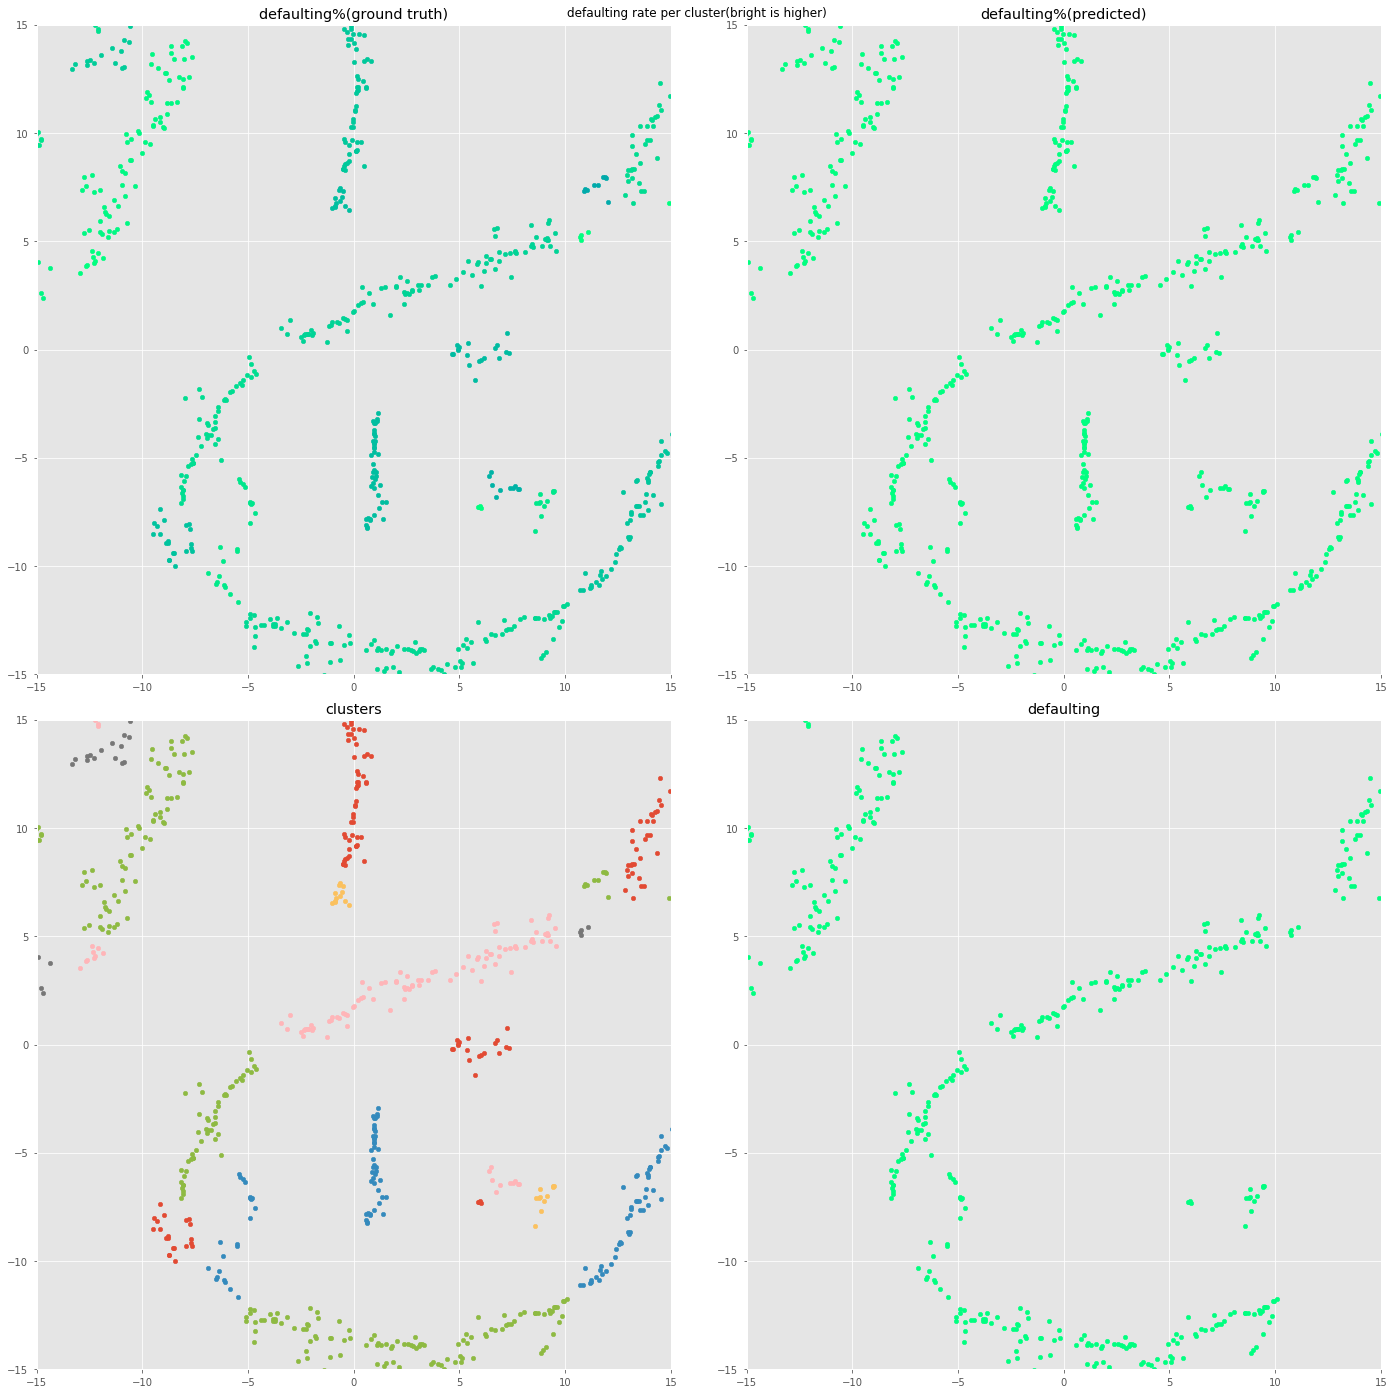

In [ ]:
fig,ax = plt.subplots(2,2)
fig.set_size_inches(20,20)


cmap = plt.cm.winter_r
color_true = cl_df['rate_truth'].apply(cmap)
color_pred = cl_df['rate_pred'].apply(cmap)

for i in [0,1]:
    for j in [0,1]:
        ax[i,j].set_xlim([-15,15])
        ax[i,j].set_ylim([-15,15])
        
        
for i in range (len(clusters)):
    d = samples[clusters[i],:]
    
    
    ax[0,0].scatter(d[:,0], d[:,1], s= 20, color= color_true[i])
    ax[0,1].scatter(d[:,0], d[:,1], s= 20, color= color_pred[i])
    
    ax[1,0].scatter(d[:,0], d[:,1], s=20)
    if i in clusters_topsel.index:
        ax[1,1].scatter(d[:,0], d[:,1], s=20 , color= color_pred[i])
        
fig.suptitle('defaulting rate per cluster(bright is higher)')

ax[0,0].set_title('defaulting%(ground truth)')
ax[0,1].set_title('defaulting%(predicted)')


ax[1,0].set_title('clusters')
ax[1,1].set_title('defaulting')

plt.tight_layout(pad=3, w_pad=4,h_pad=1.0)
plt.show()

In [ ]:
import kmapper as km

mapper = km.KeplerMapper(verbose=1)

projected_data = mapper.fit_transform(samples, projection=[0,1])

projected_data.shape


..Projecting data using: [0, 1]

..Scaling with: MinMaxScaler(copy=True, feature_range=(0, 1))



(5714, 2)

In [ ]:
#complex = mapper.map(projected_data, activations, nr_cubes=20,clusterer=tda.cluster.DBSCAN(eps=0.01,min_sampl=10), overlap_perc=0.5)

In [ ]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)
col = ["y_pred"]
dd = pd.DataFrame(y_pred)
#np.append(y_pred,x, axis=0)
dp = pd.DataFrame(y_test)
frame = [dd,dp]
#ru = pd.concat(frame, axis= 1,ignore_index=False)
#ru.to_csv("/Users/jasdeep/Desktop/cvv.csv")

In [ ]:
# b = []
# g = []

# b = y_pred
# g = y_pro
# pd.DataFrame(b,g, columns=("pred","pred1"), dtype=bool, copy=False)
#fg
# print(len(b))
# y_pred
# li12 = []
for i in y_pro:
     li12.append(i[0])
print(len(li12))

NameError: name 'y_pro' is not defined

In [ ]:
y_test_pred = y_test_pred.reshape(-1,1)

In [ ]:
li = []
k = 0
for i in y_test.index.values.tolist():
        li.append({})
        li[k]['index'] = i
        k+=1

In [ ]:
k = 0 
for i in y_test:
    li[k]['default_label'] = i
    k+=1

In [ ]:
k=0
for i in y_pred:
    li[k]['pred_label'] = i
    k+=1

In [ ]:
k=0
for i in y_test_pred:
    li[k]['accuracy'] = i[0]
    k+=1

In [ ]:
li12 = []
for i in y_pred:
    if i[0] == False:
        li12.append(0)
    if i[0] == True:
        li12.append(1)


In [ ]:
k=0
for i in li12:
    li[k]['pred_label'] = i
    k+=1

In [ ]:
panda = pd.DataFrame(data = li,columns=['index','default_label','pred_label','accuracy'])
panda.to_csv('prediction_labels1.csv',encoding='utf-8',index=False)

In [ ]:
from keras.models import load_model
model3 = load_model("/Users/jasdeep/Desktop/abc")

In [ ]:
h = model3.test_on_batch( np.array(x_test),np.array(y_test))

In [ ]:
class TestCallback(Callback):
    def __init__(self, test_data):
        self.test_data = test_data

    def on_epoch_end(self, epoch, logs={}):
        x, y = self.test_data
        loss, acc = self.model.evaluate(x, y, verbose=0)
        print('\nTesting loss: {}, acc: {}\n'.format(loss, acc))

In [ ]:
score1 = model3.evaluate(np.array(x_test),np.array(y_test), verbose = 0)
    
print ('Test log loss', score1[0])
print('Test accuracy', score1[1])


In [ ]:
model.save_weights('model_weights.h5')

with open('model_architecture.json', 'w') as f:
    f.write(model.to_json())

In [ ]:
from keras.models import model_from_json

# Model reconstruction from JSON file
with open('model_architecture.json', 'r') as f:
    model = model_from_json(f.read())


In [ ]:
h = model.test_on_batch( np.array(x_test),np.array(y_test))

In [ ]:
3